## Going from file to SCC based on CentralReach file for frequency data export and CentralReach timesheets export
# Steps the data needs to travel thru
1. Combine all data inputs into one dataframe and translate into count/min
2. Calculate all statistics necessary
3. Load into chart
    a. preferrably be allowed to define final figure information from within code
    b. interactive mode would be great as well!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import SU
import matplotlib.transforms as mtransforms
import matplotlib as mpl
from chart_formatter import DataFormatter, DateFormatter, DatePositionFormatter, TopFormatter
import numpy as np
import datetime

In [2]:
import prepper.combine
import prepper.stats

In [3]:
%load_ext autoreload

%autoreload 1

In [4]:
%aimport chart_formatter
%aimport chart

In [32]:
# load data from csv
time = pd.read_csv('/Users/taylorschley/PycharmProjects/pySCC/data/timesheets.csv')
raw = pd.read_csv('/Users/taylorschley/PycharmProjects/pySCC/data/data.csv')

In [33]:
data_combine = prepper.combine.combine_cr(time, raw)
data_combine

/Users/taylorschley/PycharmProjects/pySCC/prepper/combine.py:34: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  infer_datetime_format=True)    # convert to datetime


,data_decel,counting_time,phase,counting
2019-11-04,0.125786,318.0,intervention,0.003145
2019-11-05,0.045267,243.0,intervention,0.004115
2019-11-06,0.066667,300.0,intervention,0.003333
2019-11-07,0.027586,290.0,intervention,0.003448
2019-11-08,0.052469,324.0,intervention,0.003086
2019-11-11,0.076577,222.0,intervention,0.004505
2019-11-12,0.030435,230.0,intervention,0.004348
2019-11-13,0.069697,330.0,intervention,0.003030
2019-11-14,0.025000,320.0,intervention,0.003125
2019-11-15,0.046154,195.0,intervention,0.005128


In [34]:
data_combine = data_combine[['data_decel', 'counting']]
data_combine

,data_decel,counting
2019-11-04,0.125786,0.003145
2019-11-05,0.045267,0.004115
2019-11-06,0.066667,0.003333
2019-11-07,0.027586,0.003448
2019-11-08,0.052469,0.003086
2019-11-11,0.076577,0.004505
2019-11-12,0.030435,0.004348
2019-11-13,0.069697,0.003030
2019-11-14,0.025000,0.003125
2019-11-15,0.046154,0.005128


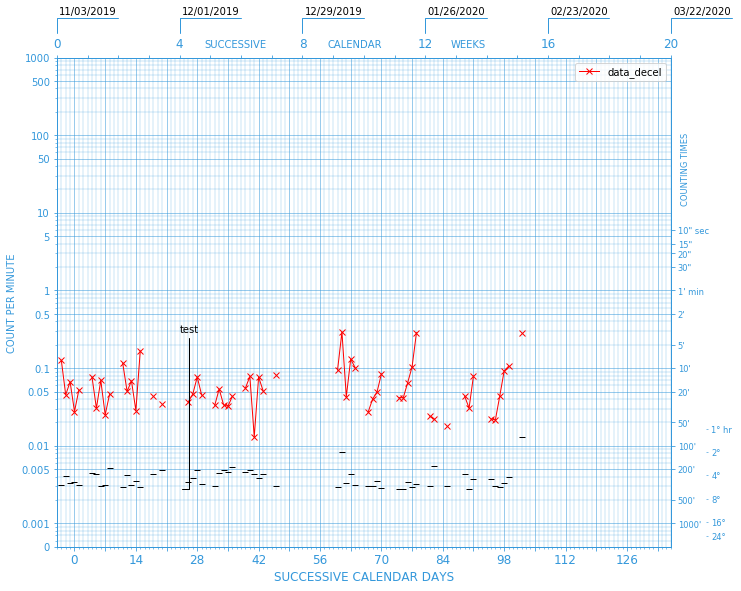

In [62]:
tmp = chart.SCC(data_combine, colors={'data_decel': 'red'}, markers={'data_decel': 'decel'}, phase_lines={'12/01/2019': 'test'})
tmp.plot()